# Прогнозирование цены

### Задача
Целевая переменная — `price`. У вас есть 4 атрибута, и, очевидно, мы хотим, чтобы вы построили некую модель машинного обучения, которая прогнозирует цены.

1. Проведите первоначальный анализ данных.
2. Используйте ML модель и кратко объясните свой выбор.
3. Покажите точность вашей модели и прокомментируйте результаты.
4. Представьте нам результаты и шаги, которые вы предприняли, а также некоторые критические размышления.

### Описание данных
Данные представлены в файле `price_sample.csv`.

### Комментарии

Определите, обучите и оцените прогнозирующую модель, которая принимает в качестве входных данных предоставленные данные. По вашему усмотрению вы можете разделить данные на наборы для обучения, тестирования.

Убедитесь, что решение отражает весь ваш мыслительный процесс (для каждой ячейки кода оставляйте комментарии, иначе мы не поймем, что вы хотели сделать)

### Что мы точно хотим увидеть в вашей работе?

1. **Анализ данных**: Проведение первичного анализа данных для понимания их структуры и основных характеристик.

2. **Обработка данных**: Это критически важный шаг, который включает в себя очистку данных, обработку пропущенных значений и дубликатов.

3. **Оценка модели**: Обучение и тестирование подходящей модели и оценка ее производительности с использованием релевантных метрик.

## Шаг 1: Анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка данных
data = pd.read_csv('price_sample.csv')

In [3]:
# Первые 5 строк данных
print(data.head())

   para1  para2    para3  para4   price
0      1  662.0   3000.0    3.8   73.49
1      1  340.0   2760.0    9.2  300.00
2      0   16.0   2700.0    3.0  130.00
3      1   17.0  12320.0    6.4  365.00
4      1  610.0   2117.0   10.8  357.50


In [4]:
# Информация о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   para1   10003 non-null  int64  
 1   para2   9997 non-null   float64
 2   para3   10003 non-null  float64
 3   para4   9998 non-null   float64
 4   price   10003 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.9 KB
None


In [5]:
# Статистика по числовым данным
print(data.describe())

              para1        para2         para3        para4         price
count  10003.000000  9997.000000  10003.000000  9998.000000  10003.000000
mean       1.380986   447.270681   9547.975527     8.458024    433.774924
std        3.500408   220.913801   8022.286943     4.613645    277.443154
min        0.000000    16.000000    200.000000     1.000000     50.730000
25%        1.000000   301.000000   2899.500000     4.000000    250.000000
50%        1.000000   434.000000   6446.000000     7.200000    370.000000
75%        1.000000   582.000000  15000.000000    13.600000    550.000000
max      337.000000  2554.000000  34782.000000    27.200000   5700.000000


In [6]:
# Проверка на наличие пропущенных значений
print(data.isnull().sum())

para1    0
para2    6
para3    0
para4    5
price    0
dtype: int64


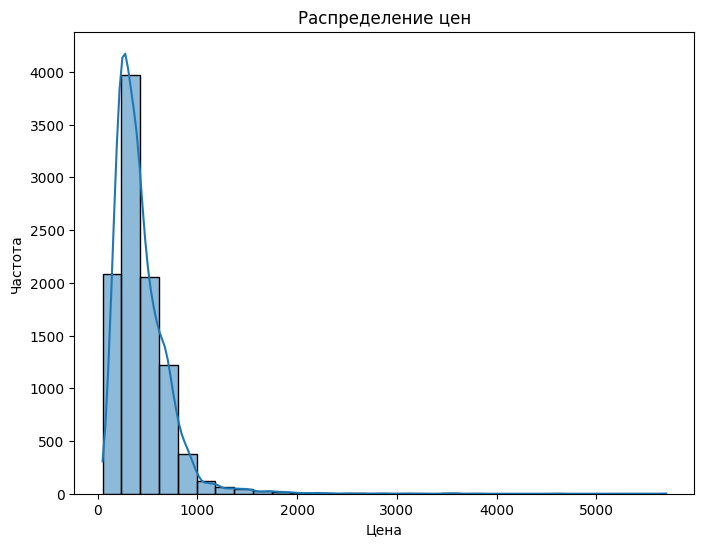

In [7]:
# Визуализация распределения целевой переменной (price)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

## Шаг 2: Обработка данных

In [8]:
# Обработка пропущенных значений
# Если пропущенные значения есть, можно заполнить их медианой (для числовых) или модой (для категориальных)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].median(), inplace=True)

<ipython-input-8-f7be831292df>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [9]:
# Проверка на наличие дубликатов
print(f"Количество дубликатов: {data.duplicated().sum()}")

Количество дубликатов: 215


In [10]:
# Удаление дубликатов
data.drop_duplicates(inplace=True)

In [11]:
# Преобразование категориальных переменных в числовые (если есть)
# Например, с помощью One-Hot Encoding
if data.select_dtypes(include=['object']).shape[1] > 0:
    data = pd.get_dummies(data, drop_first=True)

In [13]:
# Нормализация числовых признаков (если требуется)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [14]:
# Проверка результата
print(data.head())

      para1     para2     para3     para4     price
0 -0.110604  0.962685 -0.800108 -0.992039 -1.288272
1 -0.110604 -0.491277 -0.830283  0.181390 -0.476101
2 -0.393414 -1.954268 -0.837827 -1.165881 -1.085650
3 -0.110604 -1.949753  0.371691 -0.427055 -0.243039
4 -0.110604  0.727883 -0.911127  0.529072 -0.269930


## Шаг 3: Выбор модели

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

## Шаг 4: Оценка модели

In [19]:
# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coefficient of Determination (R2): {r2}")

Mean Absolute Error (MAE): 0.42695183450562463
Coefficient of Determination (R2): 0.5431833376812931


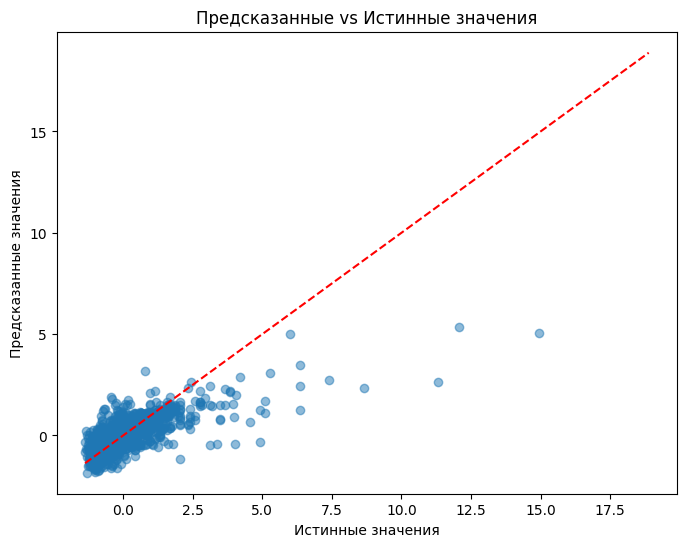

In [20]:
# Визуализация предсказаний vs истинных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального совпадения
plt.title('Предсказанные vs Истинные значения')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()